## Telco Customer Churn

Focused customer retention programs

### About Dataset

- **Context**
    Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

- **Content**
    Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

link dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
# Librerias
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Tenemos un total de 21 variables, sin embargo la variable customerID no se considera para el analisis por lo que se la elimina. Adicionalmente se puede observar que la variable TotalCharge es de tipo object lo que no tiene sentido por lo que la convertimos a float.

In [4]:
#Drop the customerID column
df = df.drop(columns=['customerID'])
#Change the TotalCharges column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Creamos una funcion para ver de cada columna de tipo object (categoricas) los valores únicos con el fin de porder observar que no exitan valores que no tengan sentido

In [5]:
def unique_values(df):
    categoricas = df.select_dtypes(include=['object'])

    for col in categoricas.columns:
        print(f"\nColumna: {col}")
        print(df[col].unique())


In [6]:
unique_values(df)


Columna: gender
['Female' 'Male']

Columna: Partner
['Yes' 'No']

Columna: Dependents
['No' 'Yes']

Columna: PhoneService
['No' 'Yes']

Columna: MultipleLines
['No phone service' 'No' 'Yes']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: OnlineBackup
['Yes' 'No' 'No internet service']

Columna: DeviceProtection
['No' 'Yes' 'No internet service']

Columna: TechSupport
['No' 'Yes' 'No internet service']

Columna: StreamingTV
['No' 'Yes' 'No internet service']

Columna: StreamingMovies
['No' 'Yes' 'No internet service']

Columna: Contract
['Month-to-month' 'One year' 'Two year']

Columna: PaperlessBilling
['Yes' 'No']

Columna: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Columna: Churn
['No' 'Yes']


Verificamos que no existan valores faltante utilizando el método *.info()*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df.columns[df.isnull().any()]

Index(['TotalCharges'], dtype='object')

De lo anterior podemos ver que tenemos un total de 16 variables categoricas, 2 variables de tipo entero y 2 variables de tipo flotante teniendo un total de 21 variables en nuestro dataset. Adicionalmente, podemos observar que existen valores faltantes por lo que es necesario tratar estos valores.

In [9]:
class MedianImputer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
        self.median_ = None

    def fit(self, X, y=None):
        # Calcula y guarda la mediana de la columna
        self.median_ = X[self.column].median()
        return self

    def transform(self, X, y=None):
        # Crea una copia para no modificar el original
        X_copy = X.copy()
        X_copy[self.column] = X_copy[self.column].fillna(self.median_)
        return X_copy

In [10]:
imputer = MedianImputer(column='TotalCharges')
df_imputado = imputer.fit_transform(df)

In [11]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Visualization

In [12]:
# Seteamos el estilo de seaborn
sns.set(style='whitegrid')

###  Distribución de la variable objetivo (Churn)

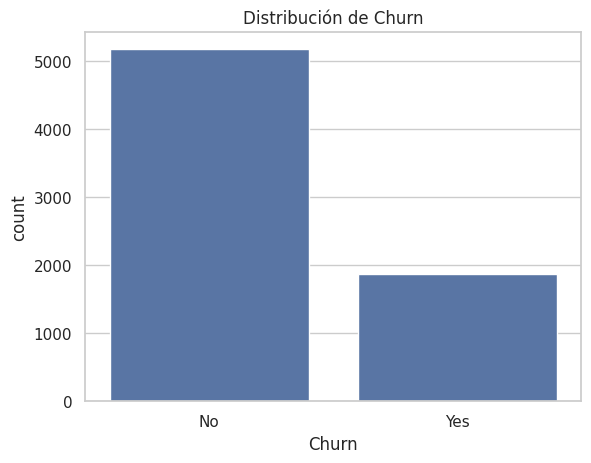

In [13]:
# Conteo de la variable objetivo
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()

De la anterior grafica podemos ver que la variable objetivo (Churn) esta desbalanceada, ya que existen 5174 clientes que se quedaron en la empresa. Por otra parte los clientes que se fueron son 1869. Existe una diferencia de 3305 registros. Sin embargo, esto seria bueno para la empresa ya que en cierto punto estan reteniendo a sus clientes.

### Histogramas de las variables numéricas

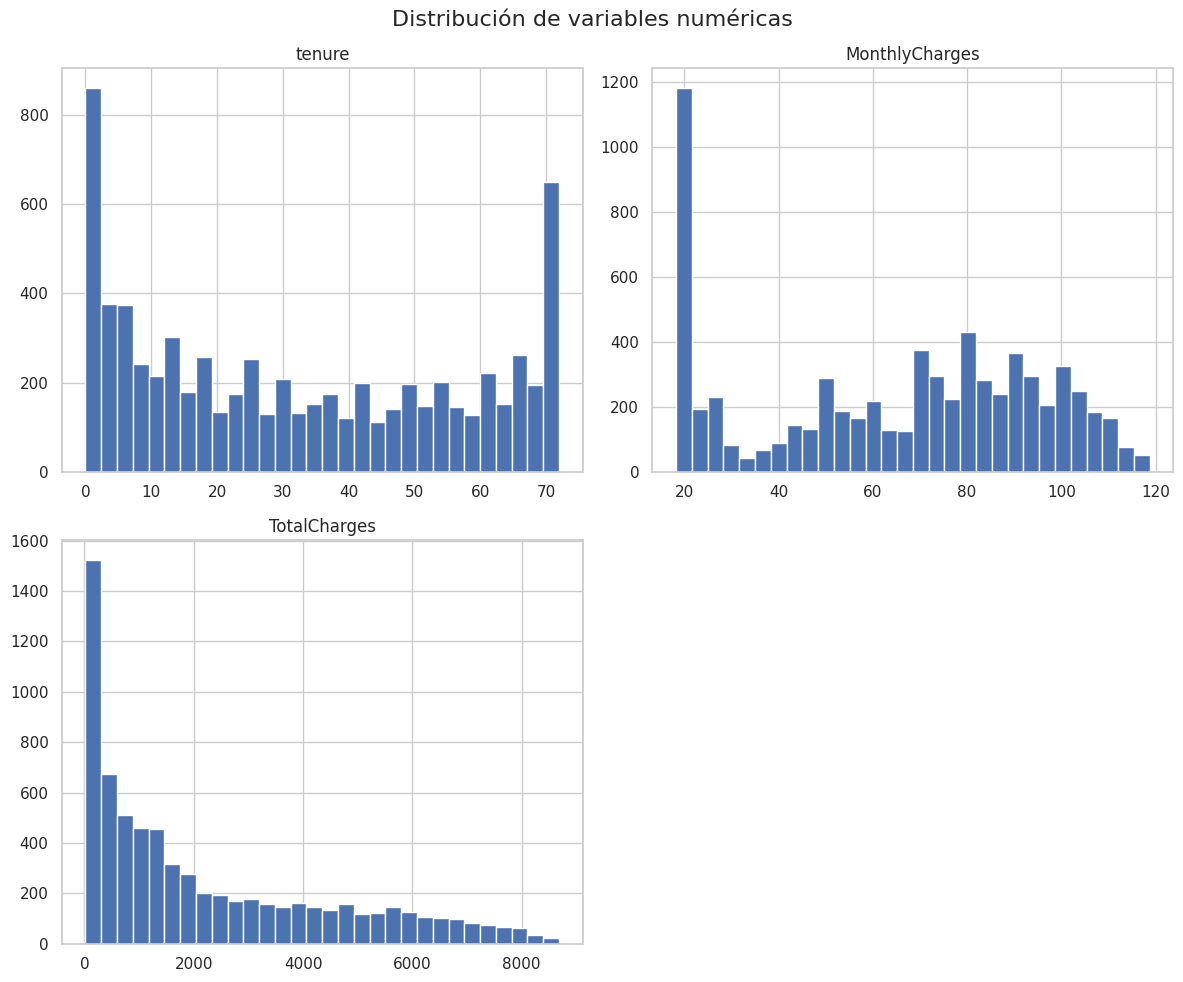

In [14]:
# Variables numericas
numericas = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Histograma
numericas.hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribución de variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()

Con respecto a la variables Tenure (Permanencia) tenemos dos picos importante, que son los que estuvieron como maximo 2 meses en la compañia y otro pico en donde el cliente permanecio mas de 70 meses. Por otra parte, los cargos mensuales que mas se registran son cercanos a 20 USD. Finalmente, los cargos totales presenta mayor registros cuantos estos son menor a 2000 USD.

### Matriz de correlación

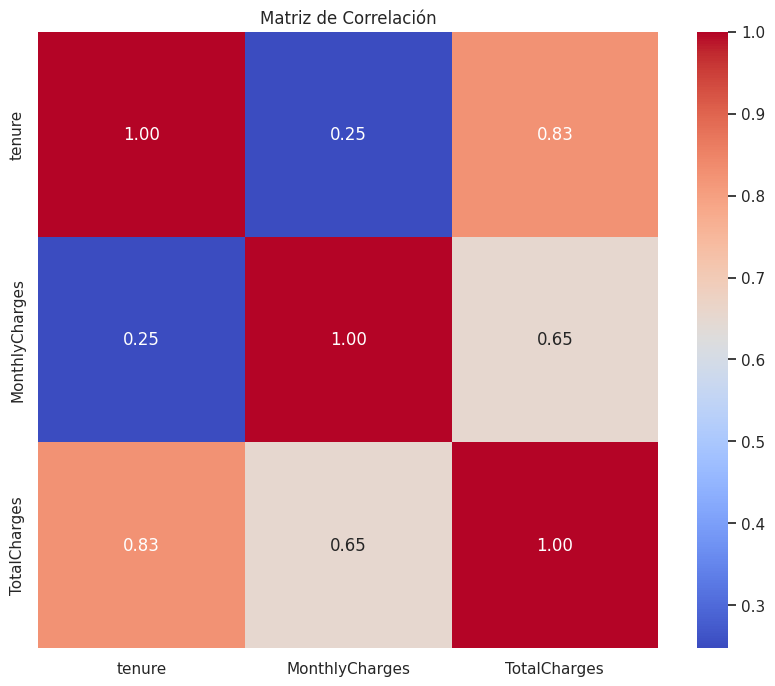

In [15]:
plt.figure(figsize=(10, 8))
corr = numericas.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Basandonos en la matriz de correlación podemos ver que la variable TotalCharges esta correlacionada con las variables tenure y MonthlyCharges. Y esto hace sentido ya que esta varaible tiene que ver tanto con los meses de permanencia como con los cargos mensuales.

### Variables categóricas vs Churn

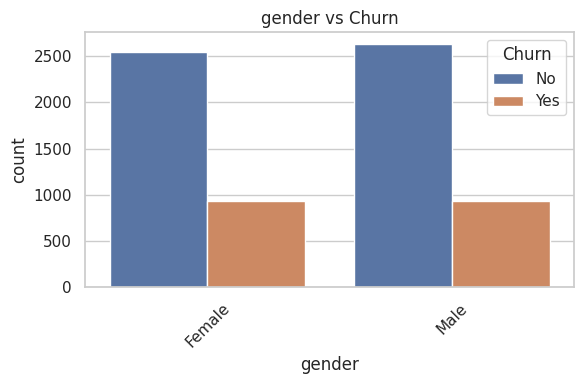

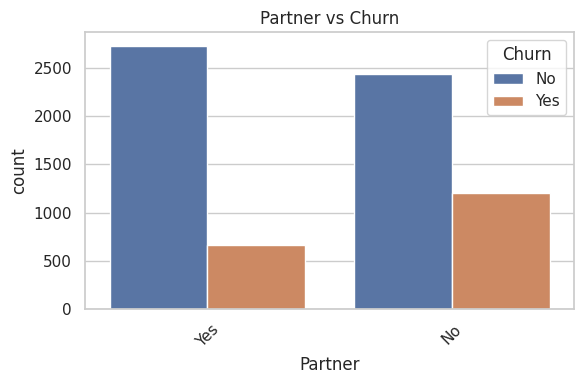

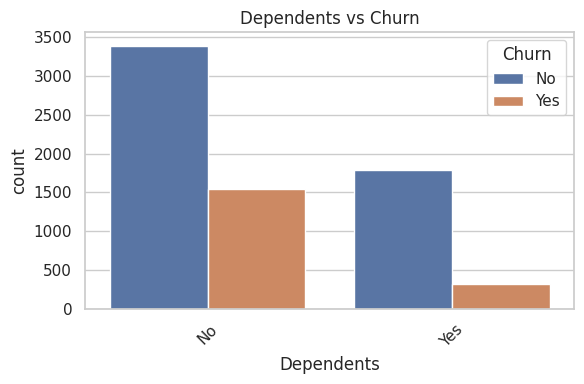

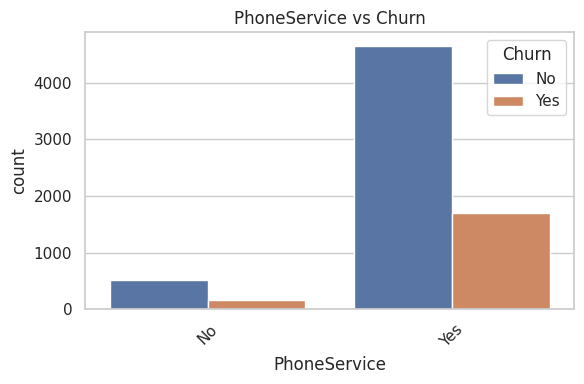

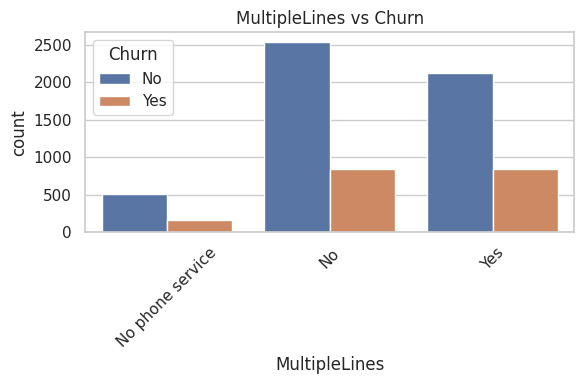

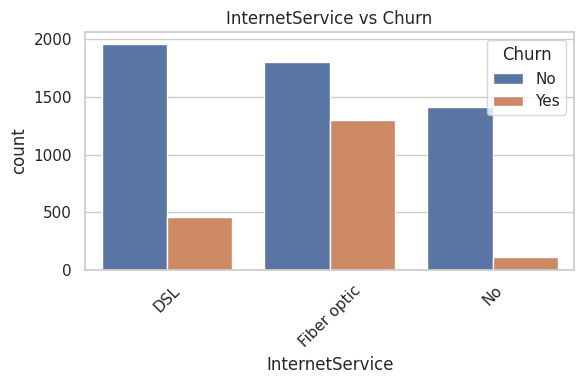

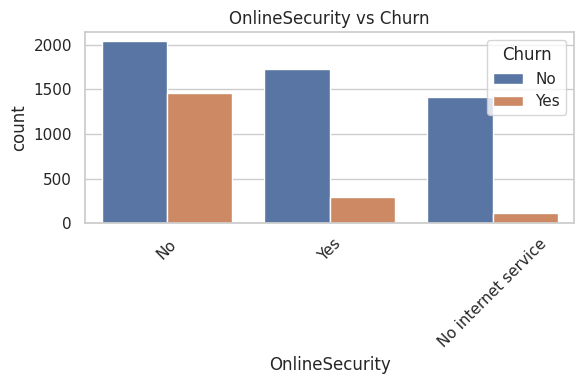

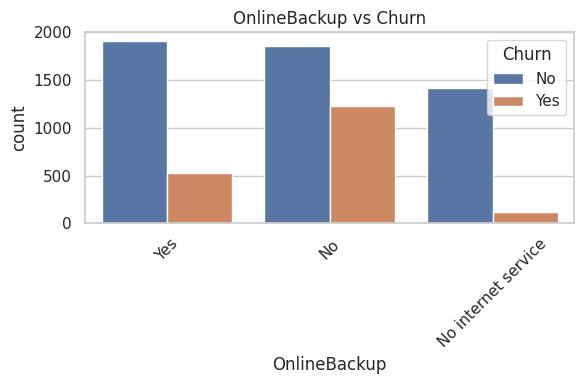

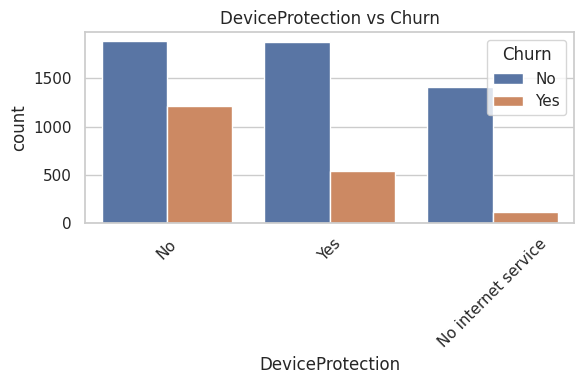

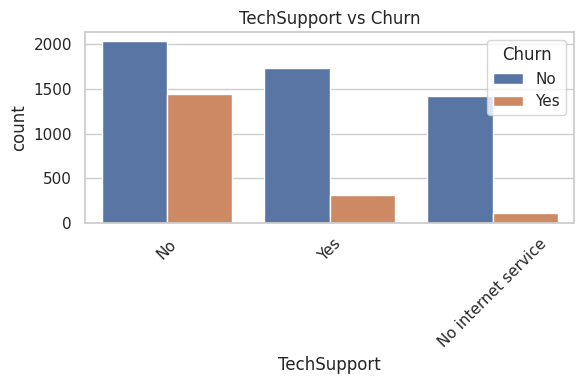

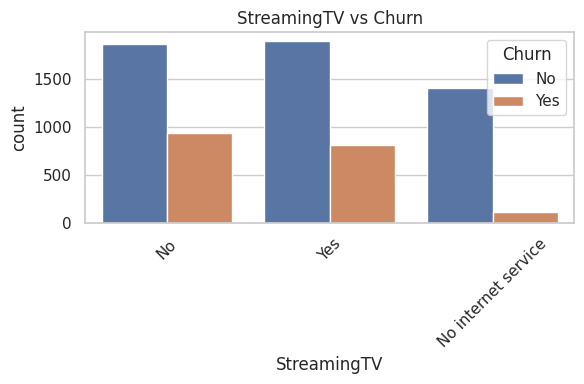

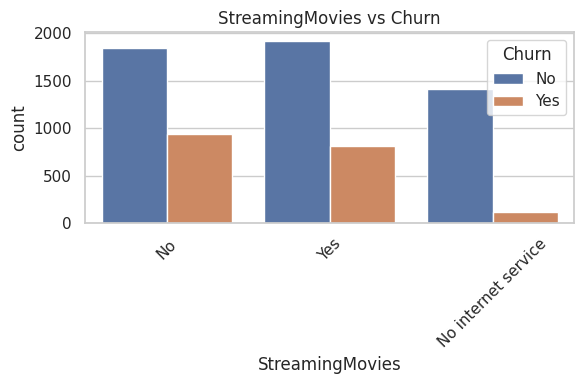

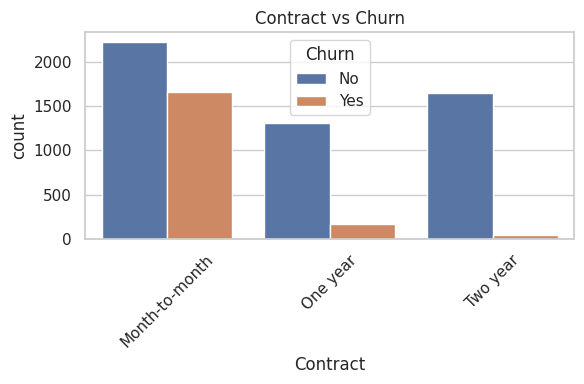

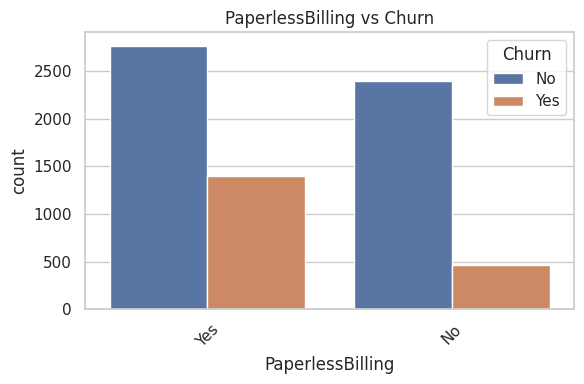

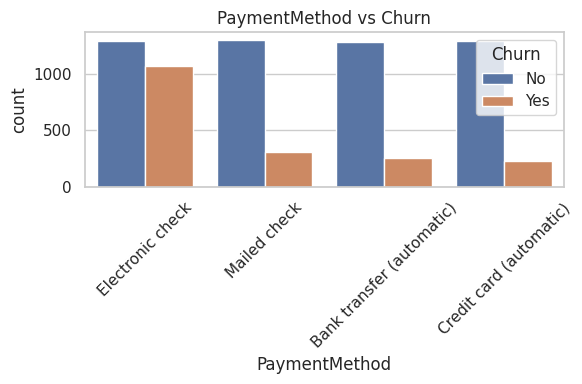

In [16]:
categoricas = df.select_dtypes(include=['object'])

for col in categoricas.columns:
    if col != 'Churn':
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue='Churn', data=df)
        plt.title(f'{col} vs Churn')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Con repecto al genero podemos ver que los clientes que se fueron de la empresa eran el 50% hombres y el otro 50% mujeres. Adicionalmente, de los clientes que se fueron la mayoria tenia servicio de telefono. Finalamente, de los clientes que se fueron la mayoria tenia servicio de interner por Fibra Optica seguido por DLS.

In [17]:
#Guardar el archivo
df_imputado.to_csv('df_imputado.csv', index=False)

## Data Preparation

In [18]:
#Ailast variable objetivo Churn
X=df_imputado.drop(columns=['Churn'])
y=df_imputado['Churn']

Se realizo una mapeo de algunas variables categoricas, especialmente de las que dependen si el cliente tiene o no ya sea servicio de telefono o de internet. En esta variables existia una categoria adicional que indicaba la ausencia del servicio correspondiente por lo que se procedio a mapear para solo tener si el cliente tiene o no el servicion

In [19]:
#Mapeo de Variables
X['gender']=X['gender'].map({'Female':0,'Male':1})
X['Partner']=X['Partner'].map({'Yes':1,'No':0})
X['Dependents']=X['Dependents'].map({'Yes':1,'No':0})
X['PhoneService']=X['PhoneService'].map({'Yes':1,'No':0})
X['MultipleLines']=X['MultipleLines'].map({'Yes':1,'No':0,'No phone service':0})
X['InternetService']=X['InternetService'].map({'DSL':1,'Fiber optic':1,'No':0})
X['OnlineSecurity']=X['OnlineSecurity'].map({'Yes':1,'No':0,'No internet service':0})
X['OnlineBackup']=X['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':0})
X['DeviceProtection']=X['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':0})
X['TechSupport']=X['TechSupport'].map({'Yes':1,'No':0,'No internet service':0})
X['StreamingTV']=X['StreamingTV'].map({'Yes':1,'No':0,'No internet service':0})
X['StreamingMovies']=X['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':0})
X['PaperlessBilling']=X['PaperlessBilling'].map({'Yes':1,'No':0})

In [20]:
unique_values(X)


Columna: Contract
['Month-to-month' 'One year' 'Two year']

Columna: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


No todas las variables categoricas fueron mapeadas ya que existian otras variables que tenian mas de dos categoricas por lo que para ellas se utilizó One-Hot para transformarlas. Para este paso se utilizo un pipeline personalizado, en donde tambien a las variables numericas se las normalizaba utilizando RobusScaler.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Atributos específicos a transformar
num_attribs = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_attribs = ['Contract', 'PaymentMethod']

# Pipeline numérico
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# ColumnTransformer que solo transforma las columnas deseadas
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
], remainder='passthrough')  # mantiene intactas las demás columnas

# Aplicamos el pipeline
X_prep_np = full_pipeline.fit_transform(X)

# Obtener nombres de columnas
num_features = num_attribs
cat_features = full_pipeline.named_transformers_['cat'].get_feature_names_out(cat_attribs)
passthrough_cols = [col for col in X.columns if col not in (num_attribs + cat_attribs)]
all_columns = list(num_features) + list(cat_features) + passthrough_cols

# Convertimos a DataFrame
X_prep = pd.DataFrame(X_prep_np, columns=all_columns, index=X.index)

In [23]:
import joblib
# Guardar pipeline
joblib.dump(full_pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [ ]:
X_prep

,tenure,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,-0.608696,-0.745170,-0.404100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.108696,-0.246550,0.145381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.586957,-0.303588,-0.380964,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.347826,-0.516099,0.130977,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-0.586957,0.006440,-0.368111,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.108696,0.265869,0.175224,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7039,0.934783,0.604416,1.762637,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
7040,-0.391304,-0.749770,-0.310552,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7041,-0.543478,0.074517,-0.322327,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Dividir el dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Codificar la variable objetivo
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3738 to 5639
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   5634 non-null   float64
 1   MonthlyCharges                           5634 non-null   float64
 2   TotalCharges                             5634 non-null   float64
 3   Contract_Month-to-month                  5634 non-null   float64
 4   Contract_One year                        5634 non-null   float64
 5   Contract_Two year                        5634 non-null   float64
 6   PaymentMethod_Bank transfer (automatic)  5634 non-null   float64
 7   PaymentMethod_Credit card (automatic)    5634 non-null   float64
 8   PaymentMethod_Electronic check           5634 non-null   float64
 9   PaymentMethod_Mailed check               5634 non-null   float64
 10  gender                                   5634 non-

### Feature Importance

In [ ]:
#Librerias
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score,classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import time
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

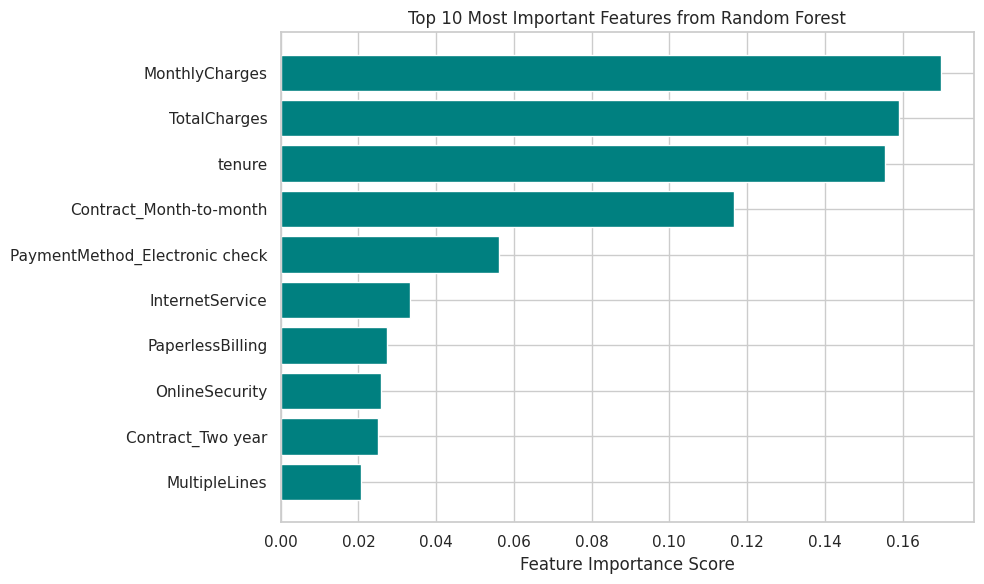

In [ ]:
# Entrenar Random Forest para obtener importancia de variables
rf_importance = RandomForestClassifier(n_estimators=30,max_depth=30, min_samples_split=10,random_state=42)
rf_importance.fit(X_train, y_train)

# Obtener importancia de variables
importances = rf_importance.feature_importances_
feature_names = X_train.columns

# Crear dataframe de importancia
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:10][::-1], feat_imp_df['Importance'][:10][::-1], color='teal')
plt.xlabel('Feature Importance Score')
plt.title('Top 10 Most Important Features from Random Forest')
plt.tight_layout()
plt.show()


In [ ]:
#Guardar el archivo
feat_imp_df.to_csv('feature_importance_df.csv', index=False)


In [ ]:
top_features = feat_imp_df['Feature'][:5].tolist()

# Subset del dataset
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

### Mejor Modelo

In [ ]:
#Mejores hiperparámetros encontrados y aplicar a las variables top
# Modelos base
base_models_best = [
    ('rf', RandomForestClassifier(n_estimators=80, max_depth=23, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=104, learning_rate=0.021848784657048745, random_state=42)),
    ('lr', LogisticRegression(C=4.714008755479693, max_iter=500, random_state=42))
]

# Meta-modelo
meta_model_best = SVC(C=3.4595865163205572, kernel='linear', probability=True, random_state=42)

# StackingClassifier
stack_model_best = StackingClassifier(
    estimators=base_models_best,
    final_estimator=meta_model_best,
    cv=5
)
# Entrenar con X_train_top
stack_model_best.fit(X_train_top, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=23,
                                                       n_estimators=80,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.021848784657048745,
                                                           n_estimators=104,
                                                           random_state=42)),
                               ('lr',
                                LogisticRegression(C=4.714008755479693,
                                                   max_iter=500,
                                                   random_state=42))],
                   final_estimator=SVC(C=3.4595865163205572, kernel='linear',
                                       probability=True, random_state=42))

In [ ]:
# Predicción y evaluación
y_pred_top = stack_model_best.predict(X_test_top)

metrics_top = {
    'Accuracy': accuracy_score(y_test, y_pred_top),
    'AUC': roc_auc_score(y_test, y_pred_top),
    'F1-Score': f1_score(y_test, y_pred_top)
}

In [ ]:
#Matriz de confusion
confusion_matrix(y_test, y_pred_top)

array([[923, 112],
       [188, 186]])

In [ ]:
print("\n Meticas using Top 5 variables\n")
metrics_top


 Meticas using Top 5 variables



{'Accuracy': 0.78708303761533,
 'AUC': np.float64(0.6945568214110414),
 'F1-Score': 0.5535714285714286}

In [ ]:
input_data = X_test_top.iloc[437].values.reshape(1, -1)

In [ ]:
predicted_class = stack_model_best.predict(input_data)[0]
predicted_proba = stack_model_best.predict_proba(input_data)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/l

In [ ]:
print(f"Predicción de clase: {predicted_class}")
print(f"Probabilidades por clase: {predicted_proba}")


Predicción de clase: 0
Probabilidades por clase: [0.93867845 0.06132155]


In [ ]:
# Guardar modelo
import joblib
joblib.dump(stack_model_best, 'stack_model_best_top_features.pkl')

['stack_model_best_top_features.pkl']

In [ ]:
#Cargar modelo
loaded_model = joblib.load('stack_model_best_top_features.pkl')

In [ ]:
predicted_class = loaded_model.predict(input_data)[0]
predicted_proba = loaded_model.predict_proba(input_data)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/l

In [ ]:
print(f"Predicción de clase: {predicted_class}")
print(f"Probabilidades por clase: {predicted_proba}")

Predicción de clase: 0
Probabilidades por clase: [0.93867845 0.06132155]


In [ ]:
prob = loaded_model.predict_proba(input_data)[0][1]
prob

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


np.float64(0.06132155131769173)

In [ ]:
#Todas las variables
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]
meta_model = SVC(probability=True,random_state=42)

stack_model_ori = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)


#Entrenar el modelo
stack_model_ori.fit(X_train, y_train)

#Predicciones
y_pred_all = stack_model_ori.predict(X_test)
#Metricas
metrics_all = {
    'Accuracy': accuracy_score(y_test, y_pred_all),
    'AUC': roc_auc_score(y_test, y_pred_all),
    'F1-Score': f1_score(y_test, y_pred_all)
}

In [ ]:
#Matriz de confusion
confusion_matrix(y_test, y_pred_all)

array([[937,  98],
       [180, 194]])

In [ ]:
print("\n Metricas using all variables\n")
metrics_all


 Metricas using all variables



{'Accuracy': 0.8026969481902059,
 'AUC': np.float64(0.7120152936009713),
 'F1-Score': 0.5825825825825826}

In [ ]:
# Guardar modelo
import joblib
joblib.dump(stack_model_ori, 'stack_model_best_all_features_ok.pkl')

['stack_model_best_all_features_ok.pkl']

In [ ]:
#DataFrame con las metricas
comparison_df_best_model = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC', 'F1-Score'],
    'All Features': [metrics_all['Accuracy'], metrics_all['AUC'], metrics_all['F1-Score']],
    'Top Features': [metrics_top['Accuracy'], metrics_top['AUC'], metrics_top['F1-Score']]
})

print(comparison_df_best_model)

     Metric  All Features  Top Features
0  Accuracy      0.802697      0.787083
1       AUC      0.712015      0.694557
2  F1-Score      0.582583      0.553571


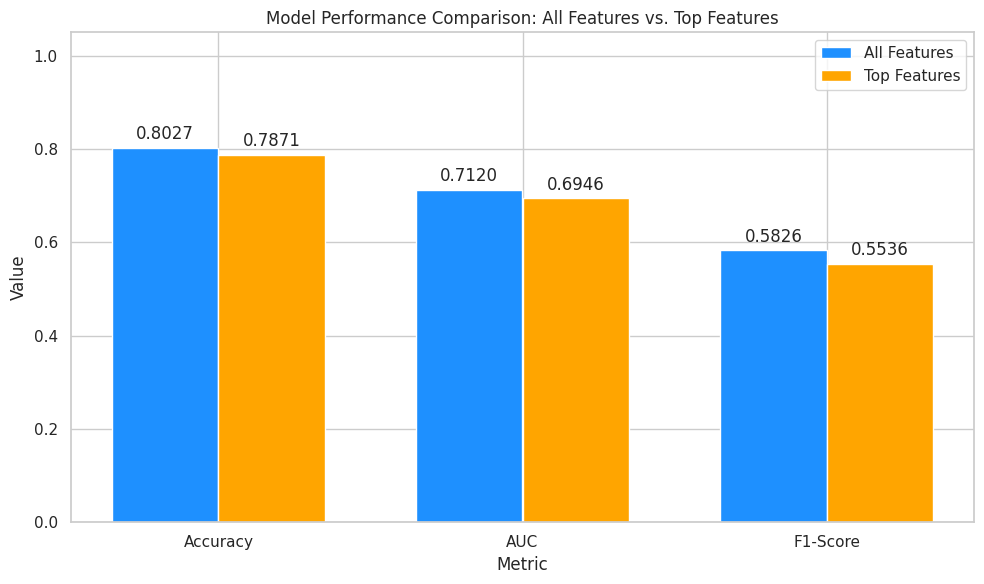

In [ ]:
# Datos de métricas
metrics_names = ['Accuracy', 'AUC', 'F1-Score']
all_values = comparison_df_best_model['All Features'][:3].values
top_values = comparison_df_best_model['Top Features'][:3].values

x = np.arange(len(metrics_names))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, all_values, width=bar_width, label='All Features', color='dodgerblue')
bars2 = plt.bar(x + bar_width, top_values, width=bar_width, label='Top Features', color='orange')

# Agregar etiquetas
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Performance Comparison: All Features vs. Top Features')
plt.xticks(x + bar_width / 2, metrics_names)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Guardar df
comparison_df_best_model.to_csv('comparison_df_best_model.csv', index=False)

## Random Forest

In [ ]:
#Implement a bagging method, such as Random Forest
rf_clf = RandomForestClassifier(n_estimators=200,max_depth=20,min_samples_split= 3,bootstrap=True,random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=200,
                       random_state=42)

In [ ]:
# Evaluate the model: Accuracy,AUC, Confusion Matrix,F1-Score
y_pred_rf = rf_clf.predict(X_test)
print("\n[--------- Random Forest-----------]\n")
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)
metrics_rf = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test,y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf)
}
print("\nMetricas:\n")
print(metrics_rf)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


[--------- Random Forest-----------]

Confusion Matrix:
 [[929 106]
 [189 185]]

Metricas:

{'Accuracy': 0.7906316536550745, 'AUC': np.float64(0.6961184737399572), 'F1-Score': 0.556390977443609}

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
#Guarda modelo
import joblib
joblib.dump(rf_clf, 'random_forest_model.pkl')

['random_forest_model.pkl']

### Single Classifier

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
#Evaluate the SVM model
y_pred_svm = svm_model.predict(X_test)
print("\n[------------SVM Classifier Results------------]\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
metrics_svm = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'AUC': roc_auc_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm)
}
print("\n Metricas \n")
print(metrics_svm)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))


[------------SVM Classifier Results------------]

Confusion Matrix:
 [[927 108]
 [189 185]]

 Metricas 

{'Accuracy': 0.7892122072391767, 'AUC': np.float64(0.695152290165078), 'F1-Score': 0.5547226386806596}

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
#Registros de y_test donde Churn es igual a 1
indices_churn_yes = y_test[y_test == 1].index
indices_churn_yes

Index([1639, 3524, 6529,  761, 6125, 5547,  346,  950, 6633, 2488,
       ...
       5662, 6599,  610, 3702, 5536,   53, 1477, 3737, 2900, 1421],
      dtype='int64', length=374)

In [ ]:
y_test

,Churn
437,0
2280,0
2235,0
4460,0
3761,0
...,...
5143,0
4439,0
3857,0
4758,0


In [ ]:
#Fila 1639 de y_test
y_test.loc[1639]

np.int64(1)

In [ ]:
df_imputado.loc[2280]

,2280
gender,Female
SeniorCitizen,1
Partner,No
Dependents,No
tenure,8
PhoneService,Yes
MultipleLines,Yes
InternetService,Fiber optic
OnlineSecurity,No
OnlineBackup,No


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 437 to 5613
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   1409 non-null   float64
 1   MonthlyCharges                           1409 non-null   float64
 2   TotalCharges                             1409 non-null   float64
 3   Contract_Month-to-month                  1409 non-null   float64
 4   Contract_One year                        1409 non-null   float64
 5   Contract_Two year                        1409 non-null   float64
 6   PaymentMethod_Bank transfer (automatic)  1409 non-null   float64
 7   PaymentMethod_Credit card (automatic)    1409 non-null   float64
 8   PaymentMethod_Electronic check           1409 non-null   float64
 9   PaymentMethod_Mailed check               1409 non-null   float64
 10  gender                                   1409 non-n

In [ ]:
X_test.loc[2280]

,tenure,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
437,0.934783,0.804048,2.089226,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2280,-0.456522,0.548298,-0.144465,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2235,0.260870,0.147194,0.535911,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4460,-0.239130,0.144434,0.021060,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3761,0.934783,0.226311,1.336103,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,0.434783,0.310028,0.870922,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4439,-0.021739,-0.920883,-0.268742,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3857,-0.521739,-0.914443,-0.385278,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4758,0.586957,-0.931923,-0.102109,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
input_data=X_test.loc[2280].values.reshape(1,-1)
input_data

array([[-0.45652174,  0.54829807, -0.14446537,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  1.        ,  1.        ]])

In [ ]:
#Revertir el robust scaler


In [ ]:
predicted_class = svm_model.predict(input_data)[0]
predicted_proba = svm_model.predict_proba(input_data)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#Imprimir predicciones
print(f"Predicción de clase: {predicted_class}")
print(f"Probabilidades por clase: {predicted_proba}")

Predicción de clase: 1
Probabilidades por clase: [0.18141585 0.81858415]


In [ ]:
#Guardar modelo
import joblib
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

### Grafica

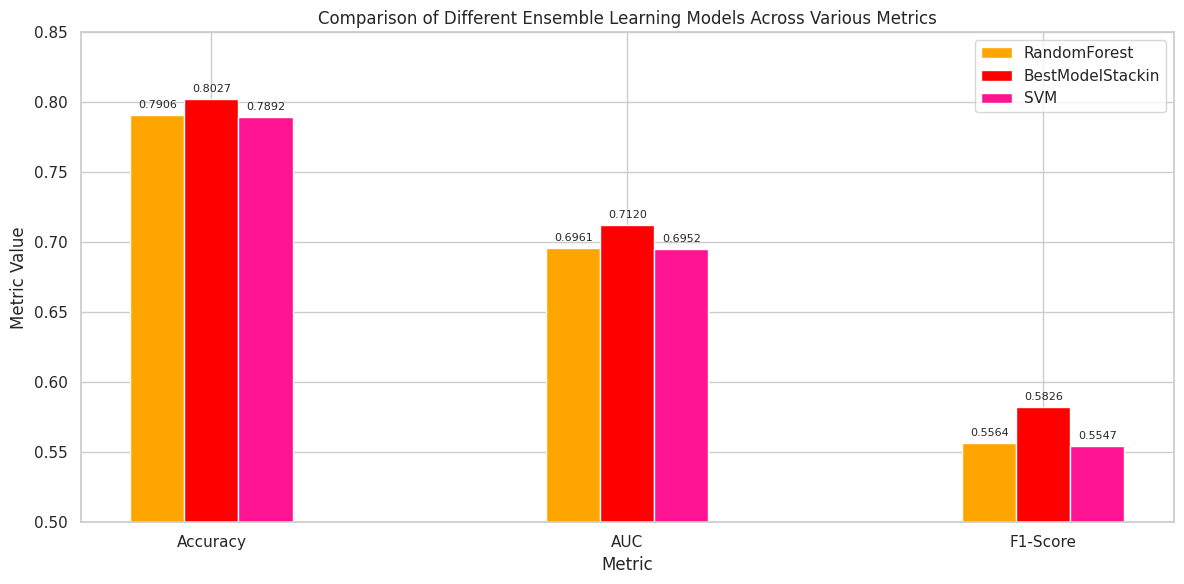

In [ ]:
# Resultados de métricas por modelo (reemplaza con tus valores reales)
# Orden: [Accuracy, AUC, F1-Score]
results = {
    'RandomForest': [metrics_rf['Accuracy'], metrics_rf['AUC'], metrics_rf['F1-Score']],
    'BestModelStackin': [metrics_all['Accuracy'], metrics_all['AUC'], metrics_all['F1-Score']],
    'SVM': [ metrics_svm['Accuracy'], metrics_svm['AUC'], metrics_svm['F1-Score']]
}

metrics = ['Accuracy', 'AUC', 'F1-Score']
num_metrics = len(metrics)
num_models = len(results)
bar_width = 0.13
x = np.arange(num_metrics)

colors = ['orange', 'red', 'deeppink']

plt.figure(figsize=(12, 6))

# Dibujar las barras para cada modelo
for i, (model, scores) in enumerate(results.items()):
    positions = x + i * bar_width
    plt.bar(positions, scores, width=bar_width, label=model, color=colors[i])

    # Añadir anotaciones de valor encima de las barras
    for j, score in enumerate(scores):
        plt.text(positions[j], score + 0.005, f"{score:.4f}", ha='center', fontsize=8)

# Configurar los ejes
plt.xlabel('Metric')
plt.ylabel('Metric Value')
plt.title('Comparison of Different Ensemble Learning Models Across Various Metrics')
plt.xticks(x + bar_width * (num_models - 1) / 2, metrics)
plt.ylim(0.5, 0.85)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Convertir el diccionario a DataFrame
df_results = pd.DataFrame(results, index=['Accuracy', 'AUC', 'F1-Score']).T

# Mostrar el DataFrame
print(df_results)

                  Accuracy       AUC  F1-Score
RandomForest      0.790632  0.696118  0.556391
BestModelStackin  0.802697  0.712015  0.582583
SVM               0.789212  0.695152  0.554723


In [ ]:
#Guardar df
df_results.to_csv('df_results.csv', index=False)
